# Perceptron Adaline

## Opérateur logique ET (table 2.3)


In [1]:
from perceptron import PerceptronAdaline
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

perceptron = PerceptronAdaline(input_size=2, learning_rate=0.03, epochs=10000)
perceptron.weights = [0.0,0.0,0.0]

df = load_dataframe_from_file("../datasets/table_2_3.csv")
print(df)

history = perceptron.train_classification(df, seuil=0.1251)
print(history)

      inputs  label
0  [1, 0, 0]     -1
1  [1, 0, 1]     -1
2  [1, 1, 0]     -1
3  [1, 1, 1]      1
epoch                                                     202
mse                                                  0.125099
accuracy                                                  1.0
weights     [-1.4878343373029261, 1.0086269431990043, 0.99...
Name: 201, dtype: object


Une fois que l'entrainement est terminé, on constate que les prédictions du neurone sont bonnes :

In [2]:
for _, row in df.iterrows():
    print(f"Cas {row["inputs"][1:]} : {perceptron.round_predict(row["inputs"])}")

Cas [0 0] : -1
Cas [0 1] : -1
Cas [1 0] : -1
Cas [1 1] : 1


Voici maintenant deux graphiques reprenant respectivement l'évolution de la précision, l'évolution de l'erreur moyenne quadratique du perceptron et l'évolution des poids de celui-ci

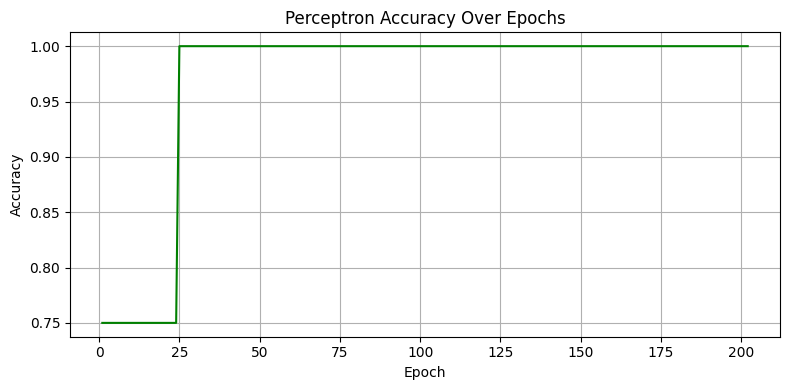

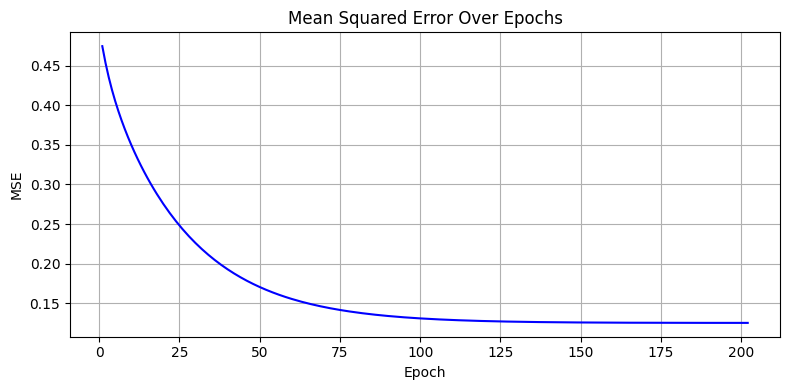

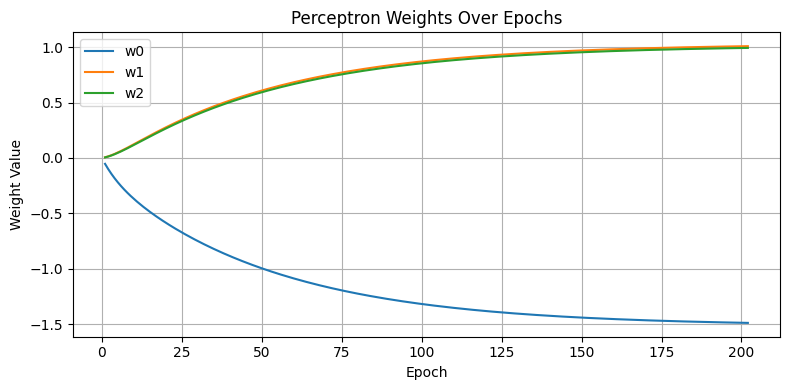

In [3]:
training = history.df

# Évolution de l'entrainement
plt.figure(figsize=(8, 4))
plt.plot(training['epoch'], training['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Perceptron Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(training['epoch'], training['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

weights_df = pd.DataFrame(training["weights"].to_list(), columns=[f"w{i}" for i in range(len(training['weights'].iloc[0]))])
weights_df["epoch"] = training["epoch"]
plt.figure(figsize=(8, 4))
for col in weights_df.columns:
    if col != "epoch":
        plt.plot(weights_df["epoch"], weights_df[col], label=col)



plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title("Perceptron Weights Over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Il est clair ici que la précision augmente avec les itérations et atteint rapidement les 100%

Voici maintenant un graphique de la droite de décision

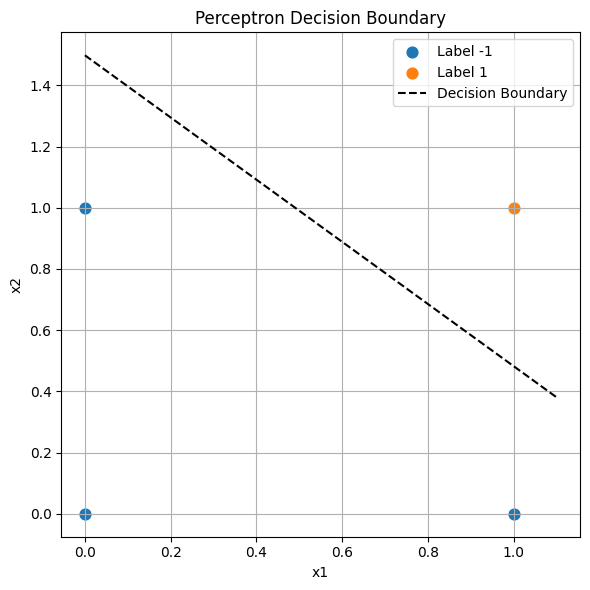

In [4]:
final_weights = perceptron.weights
bias = final_weights[0]
w1 = final_weights[1]
w2 = final_weights[2]
X = np.array([inp[1:] for inp in df["inputs"]])
y = df["label"].values
plt.figure(figsize=(6, 6))
for label in np.unique(y):
    points = X[y == label]
    plt.scatter(points[:, 0], points[:, 1], label=f"Label {label}", s=60)

# y = -(bias + w1*x) / w2
x_vals = np.linspace(0, 1.1, 100)
if w2 != 0:
    y_vals = -(bias + w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
else:
    x_intercept = -bias / w1 if w1 != 0 else 0
    plt.axvline(x=x_intercept, color='k', linestyle='--', label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

La droite de décision sépare bien les points de façon assez large, à mi-distance entre les points, ce qui démontre que le perceptron Adaline se généralise plutôt bien

## Classification de données linéaires séparables (table 2.9)

In [5]:
exemple2 = PerceptronAdaline(input_size=2, learning_rate=0.012, epochs=1000)
df = load_dataframe_from_file("../datasets/table_2_9.csv")
print(df)
exemple2.weights = np.array([0.0,0.0,0.0])
history = exemple2.train_classification(df, seuil=0, until_no_error=True)
print(history)

        inputs  label
0    [1, 1, 6]      1
1    [1, 7, 9]     -1
2    [1, 1, 9]      1
3   [1, 7, 10]     -1
4    [1, 2, 5]     -1
5    [1, 2, 7]      1
6    [1, 2, 8]      1
7    [1, 6, 8]     -1
8    [1, 6, 9]     -1
9    [1, 3, 5]     -1
10   [1, 3, 6]     -1
11   [1, 3, 8]      1
12   [1, 3, 9]      1
13   [1, 5, 7]     -1
14   [1, 5, 8]     -1
15  [1, 5, 10]      1
16  [1, 5, 11]      1
17   [1, 4, 6]     -1
18   [1, 4, 7]     -1
19   [1, 4, 9]      1
20  [1, 4, 10]      1
epoch                                                      92
mse                                                  0.135008
accuracy                                                  1.0
weights     [-0.7346388999999962, -0.46558411075396566, 0....
Name: 91, dtype: object


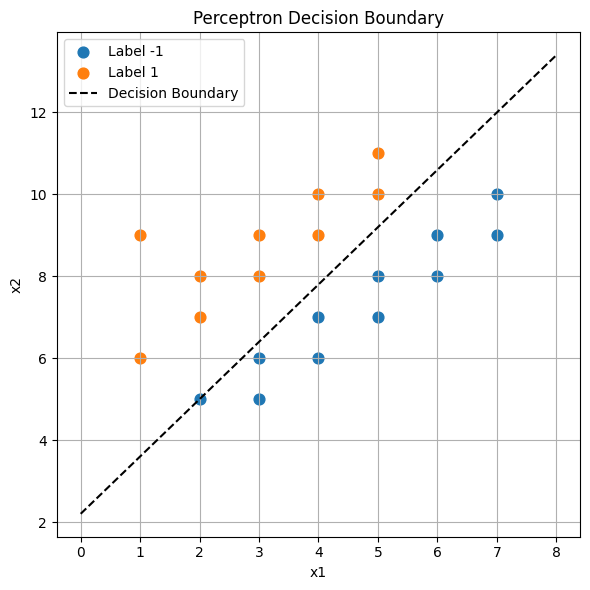

In [6]:
final_weights = exemple2.weights
bias = final_weights[0]
w1 = final_weights[1]
w2 = final_weights[2]
X = np.array([inp[1:] for inp in df["inputs"]])
y = df["label"].values
plt.figure(figsize=(6, 6))
for label in np.unique(y):
    points = X[y == label]
    plt.scatter(points[:, 0], points[:, 1], label=f"Label {label}", s=60)

x_vals = np.linspace(0, 8, 100)
if w2 != 0:
    y_vals = -(bias + w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
else:
    x_intercept = -bias / w1 if w1 != 0 else 0
    plt.axvline(x=x_intercept, color='k', linestyle='--', label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Classification de données non linéairement séparables (table 2.10)

In [7]:
exemple3 = PerceptronAdaline(input_size=2, learning_rate=0.0015, epochs=1000)
df = load_dataframe_from_file("../datasets/table_2_10.csv")
print(df)
exemple3.weights = np.array([0.0,0.0,0.0])
history = exemple3.train_classification(df, seuil=0)
print(history)

       inputs  label
0   [1, 1, 2]      1
1   [1, 1, 4]     -1
2   [1, 1, 5]      1
3   [1, 7, 5]     -1
4   [1, 7, 6]     -1
5   [1, 2, 1]     -1
6   [1, 2, 3]      1
7   [1, 2, 4]      1
8   [1, 6, 2]      1
9   [1, 6, 4]     -1
10  [1, 6, 5]     -1
11  [1, 3, 1]     -1
12  [1, 3, 2]     -1
13  [1, 3, 4]      1
14  [1, 3, 5]      1
15  [1, 5, 3]     -1
16  [1, 5, 4]     -1
17  [1, 5, 6]      1
18  [1, 5, 7]      1
19  [1, 4, 2]     -1
20  [1, 4, 3]      1
21  [1, 4, 5]      1
22  [1, 4, 6]      1
epoch                                                    1000
mse                                                  0.360806
accuracy                                             0.869565
weights     [-0.02267341157610299, -0.2542199638969986, 0....
Name: 999, dtype: object


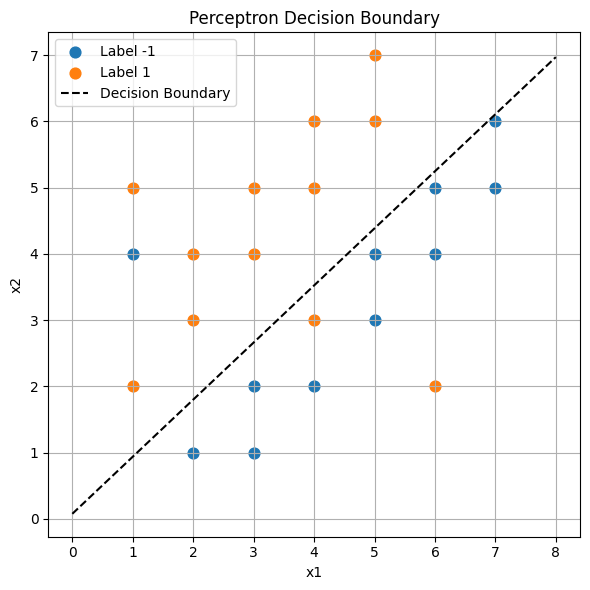

In [8]:
final_weights = exemple3.weights
bias = final_weights[0]
w1 = final_weights[1]
w2 = final_weights[2]
X = np.array([inp[1:] for inp in df["inputs"]])
y = df["label"].values
plt.figure(figsize=(6, 6))
for label in np.unique(y):
    points = X[y == label]
    plt.scatter(points[:, 0], points[:, 1], label=f"Label {label}", s=60)

x_vals = np.linspace(0, 8, 100)
if w2 != 0:
    y_vals = -(bias + w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
else:
    x_intercept = -bias / w1 if w1 != 0 else 0
    plt.axvline(x=x_intercept, color='k', linestyle='--', label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Régression linéaire (table 2.11)

In [9]:
exemple4 = PerceptronAdaline(input_size=1, learning_rate=0.00014, epochs=10000)
df = load_dataframe_from_file("../datasets/table_2_11.csv")
print(df)
exemple4.weights = np.array([0.0,0.0])
history = exemple4.train_regression(df, seuil=0.56)
print(history)

     inputs  label
0   [1, 10]    4.4
1   [1, 14]    5.6
2   [1, 12]    4.6
3   [1, 18]    6.1
4   [1, 16]    6.0
5   [1, 14]    7.0
6   [1, 22]    6.8
7   [1, 28]   10.6
8   [1, 26]   11.0
9   [1, 16]    7.6
10  [1, 23]   10.8
11  [1, 25]   10.0
12  [1, 20]    6.5
13  [1, 20]    8.2
14  [1, 24]    8.8
15  [1, 12]    5.5
16  [1, 15]    5.0
17  [1, 18]    8.0
18  [1, 14]    7.8
19  [1, 26]    9.0
20  [1, 25]    9.4
21  [1, 17]    8.5
22  [1, 12]    6.4
23  [1, 20]    7.5
24  [1, 23]    9.0
25  [1, 22]    8.1
26  [1, 26]    8.2
27  [1, 22]   10.0
28  [1, 18]    9.1
29  [1, 21]    9.0
1.6021236032237391
0.6314383055600828
0.6018650995243905
0.5842475735068915
0.5737342993042824
0.5674466797989641
0.5636757260661729
0.5614060850846465
0.560033937139598
epoch                                          8034
mse                                        0.559999
weights    [1.7496438910238827, 0.3180472141422046]
Name: 8033, dtype: object


Si nous affichons le graphique, on constate que la droite de régression passe bien au milieu du nuage de points

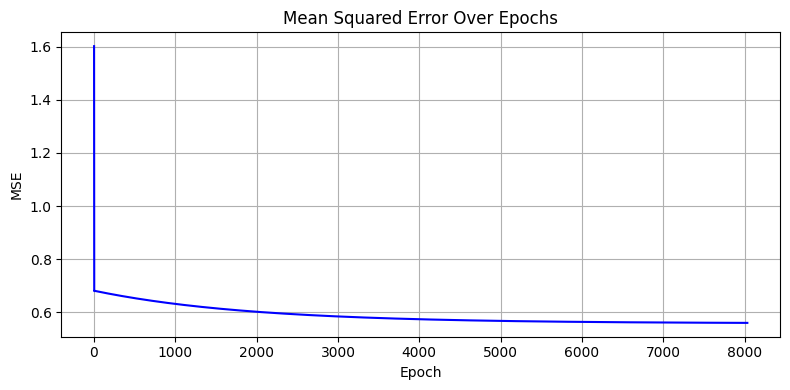

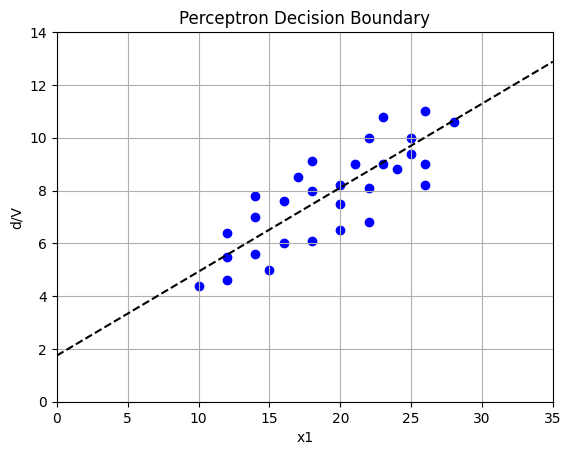

In [10]:
graph = history.df
plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

weights = exemple4.weights
bias = weights[0]
w1 = weights[1]
x_vals = np.array([val[1] for val in df["inputs"]])
x_vals = np.linspace(0, 35, 100)
y_line = bias + w1 * x_vals

x = [item[1] for item in df['inputs']]
y = df['label']

# Création du graphique
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_vals, y_line, 'k--', label="Decision Boundary")

# Ajout d'un titre et des labels
plt.title("Perceptron Decision Boundary")
plt.xlabel("x1")
plt.ylabel("d/V")
plt.xlim(0, 35)
plt.ylim(0, 14)

plt.grid(True)

plt.show()